Baratam Durgaprasad


In [ ]:
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
filename = "Energy Meter.csv"

In [ ]:
names = ('Voltage','Current','Power','Class')

In [ ]:
dataset = read_csv(filename,names=names)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train,X_validation,Y_train,Y_validation = train_test_split(X,y,test_size=0.20,random_state=1)


In [ ]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))


LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.993750 (0.018750)
NB: 0.990625 (0.020010)
SVM: 0.990625 (0.020010)


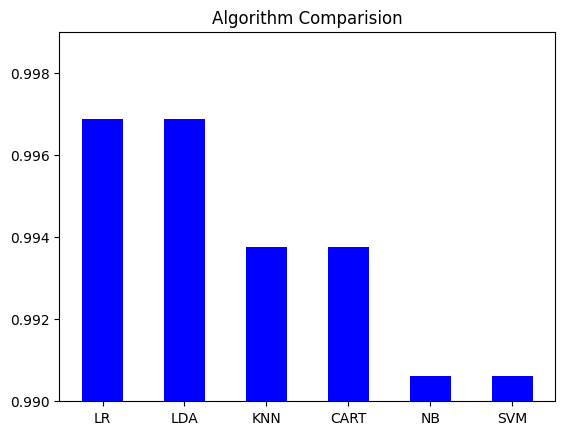

In [ ]:
#validation
results = []
names = []
res = []
for name,model in models:
  kfold =  StratifiedKFold(n_splits=10,random_state=None)
  cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s: %f (%f)'% (name,cv_results.mean(),cv_results.std()))

pyplot.ylim(.990,.999)
pyplot.bar(names,res,color = 'blue',width =0.5)

pyplot.title('Algorithm Comparision')
pyplot.show()
